In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("CarPrice_Assignment.csv")
print(data.head())
print(data.info())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [2]:
data = data.drop(['CarName', 'car_ID'], axis=1)
data = pd.get_dummies(data, drop_first=True)

In [3]:
X = data.drop('price', axis=1)
y = data['price']

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(np.array(y).reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_model.fit(X_train, y_train.ravel())
y_pred = sgd_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Name: Harish Pranav')
print('Reg. No: 212225040117')
print("="*50)
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print("="*50)
print("\nModel Coefficients:")
print("\nCoefficients:", sgd_model.coef_)
print("\nIntercept:", sgd_model.intercept_)

      


Name: Harish Pranav
Reg. No: 212225040117
MSE: 0.22
R2: 0.8225
MAE: 0.33

Model Coefficients:

Coefficients: [ 0.03403549  0.11206967  0.01877282  0.17331452  0.02108491  0.16793613
  0.27586908 -0.01370507 -0.08035289  0.00273122  0.1084771   0.03583549
 -0.04488019 -0.05055738 -0.01841409  0.01935939  0.02078135 -0.01182126
 -0.08362752 -0.00922744 -0.09096878 -0.03372662  0.06768955  0.21146884
  0.01820505 -0.0995099   0.06995602 -0.01590722  0.00583599  0.01075898
 -0.0244945  -0.14379635 -0.06691805  0.00080586 -0.02100409  0.01075898
 -0.00272005 -0.01757419  0.01841409 -0.01649729 -0.02534043 -0.03672898
 -0.01573245]

Intercept: [-0.01150997]


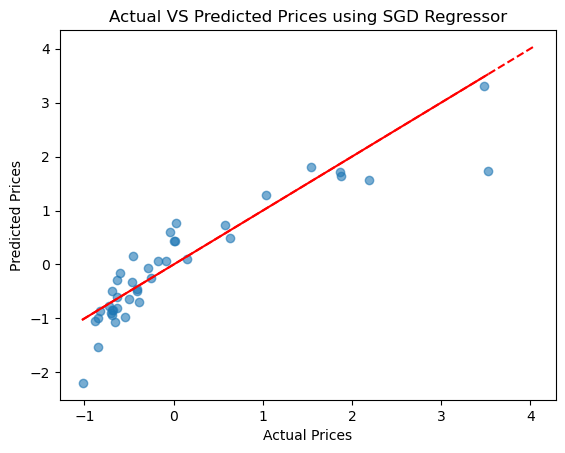

In [18]:
plt.scatter(y_test,y_pred,alpha=0.6)
plt.plot([y.min(),y.max()], [y.min(),y.max()],'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual VS Predicted Prices using SGD Regressor")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()